### Data

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

 

### Goals of the Case Study

There are quite a few goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [25]:
# Importing the NumPy and Pandas packages

import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [26]:
df = pd.read_csv("Leads.csv")
df.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [27]:
df.shape

(9240, 37)

In [28]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [30]:
#convert int to float 'Total Time Spent on Website'
df['Total Time Spent on Website'] = df['Total Time Spent on Website'].astype(float)

In [31]:
#check the null value
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [32]:
#fill the blank value with mean 
df['TotalVisits'].fillna(df['TotalVisits'].mean(), inplace=True)
df['Total Time Spent on Website'].fillna(df['Total Time Spent on Website'].mean(), inplace=True)
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].mean(), inplace=True)


### Visualizing the features with `Select` values

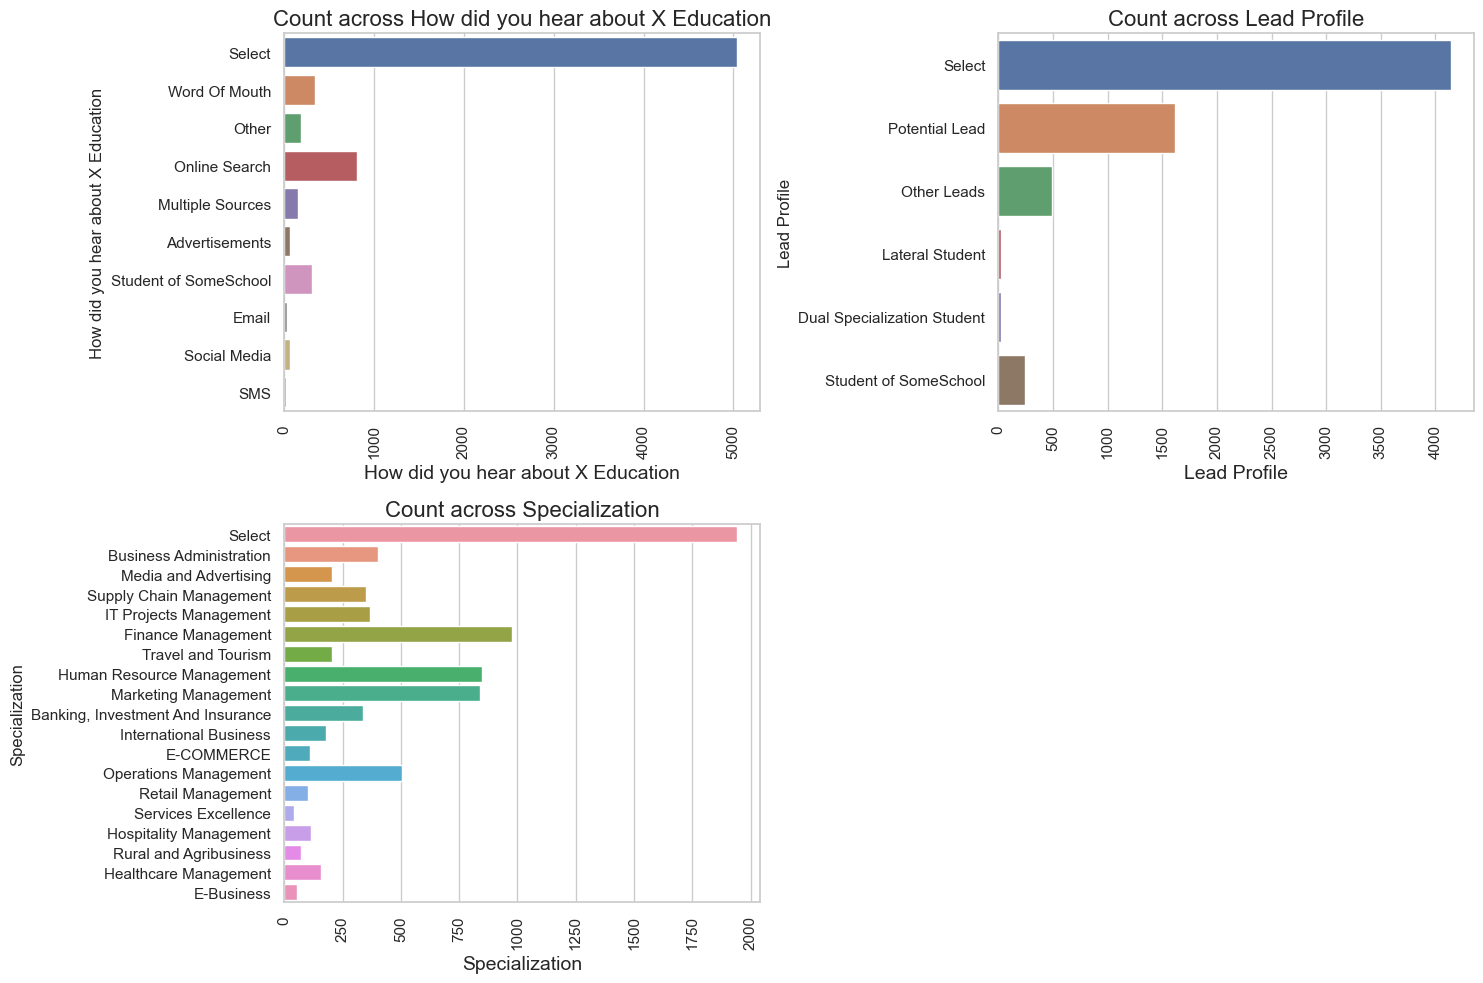

In [33]:
def countplot(x, fig):
    plt.subplot(2,2, fig)
    sns.countplot(data=df,y=df[x])
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(15,10))

countplot('How did you hear about X Education',1)
countplot('Lead Profile',2)
countplot('Specialization',3)



plt.tight_layout()

In [9]:
#Checking null values percentage
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
#replace 'Select' values with null/nan values
df = df.replace('Select', np.nan)

In [11]:
#data columns
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Step 1: Data Cleaning and Preparation

In [12]:
# Checking the number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Prospect ID                                         0
Through Recommendations     

It's seen that there are a lot of columns which have high number of missing values. Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe, let's eliminate the columns having greater than 3000 missing values as they are of no use to us.

In [13]:
# Droping all the columns in which greater than 
for c in df.columns:
    if df[c].isnull().sum()>3000:
        df.drop(c, axis=1,inplace=True)

In [14]:
df.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Last Activity                                     103
Lead Source                                        36
Newspaper Article                                   0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Prospect ID                                         0
Magazine                                            0
Search                                              0
Lead Number                 

In [15]:
#checking value counts of "Country" column
df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

India has the most number of leads, though the other country data are not much useful, lets drop this as well

In [16]:
# dropping the "Country" feature
df.drop(['Country'], axis = 1, inplace = True)

In [17]:
#Now checking the percentage of missing values in each column

round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     1.11
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [18]:
# checking the value counts of all the columns

for c in df:
    print(df[c].astype('category').value_counts())
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

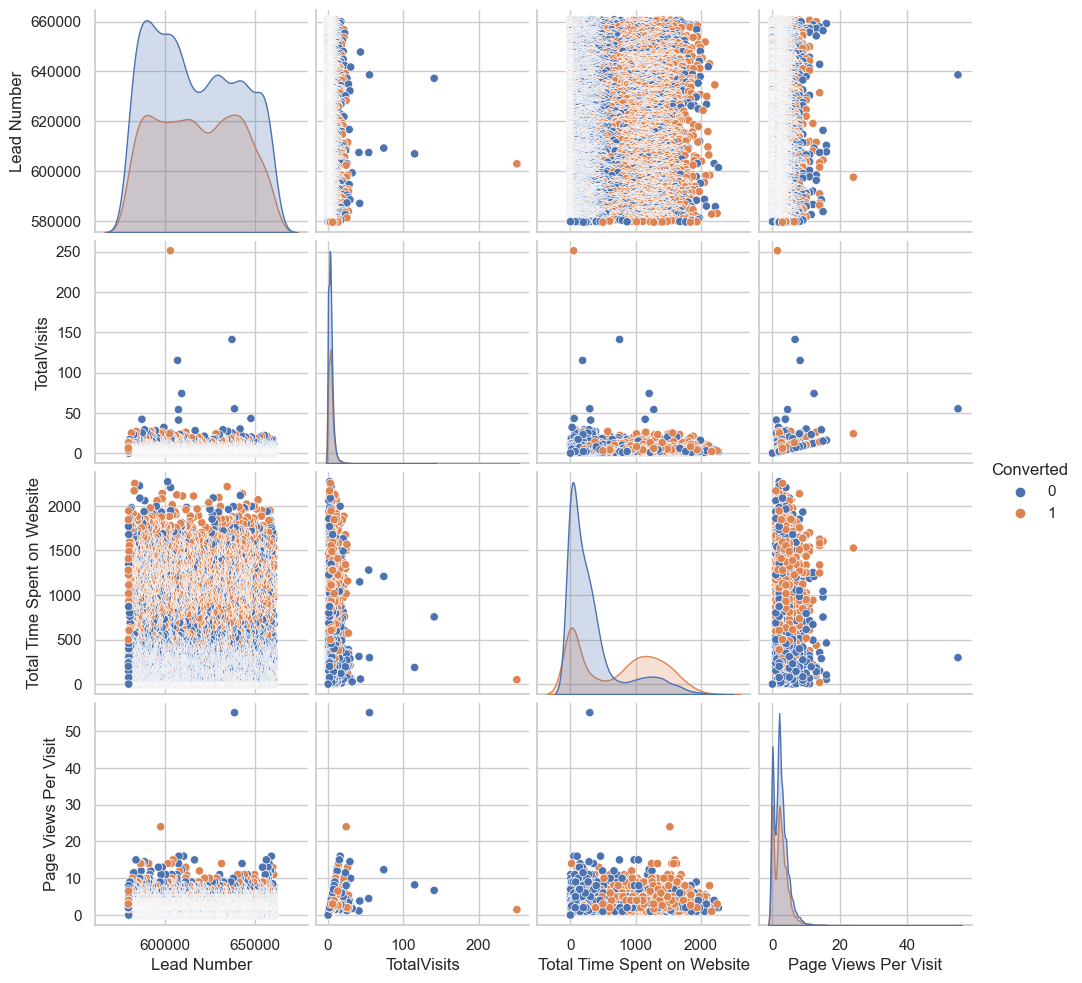

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(df,diag_kind='kde',hue='Converted')
plt.show()

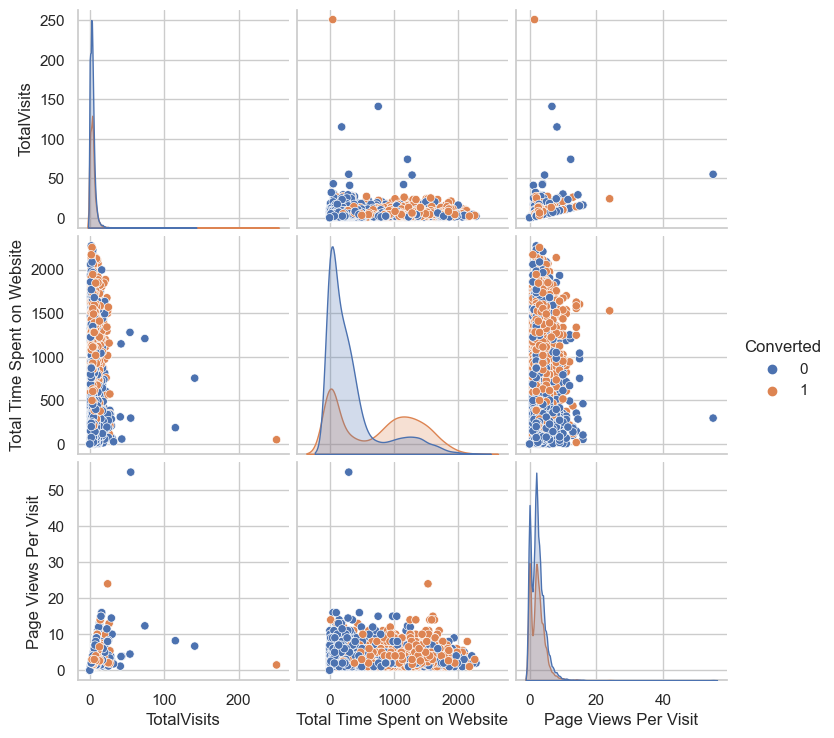

In [20]:
x = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(x,diag_kind='kde',hue='Converted')
plt.show()

In [21]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedx = pd.DataFrame(pt.fit_transform(x))
transformedx.columns = x.columns
transformedx.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.469319,-1.473767,-1.465677,-0.791863
1,0.746257,0.729628,0.304699,-0.791863
2,-0.150936,1.306093,0.059688,1.262845
3,-0.651852,0.264936,-0.546530,-0.791863
4,-0.150936,1.252499,-0.546530,1.262845


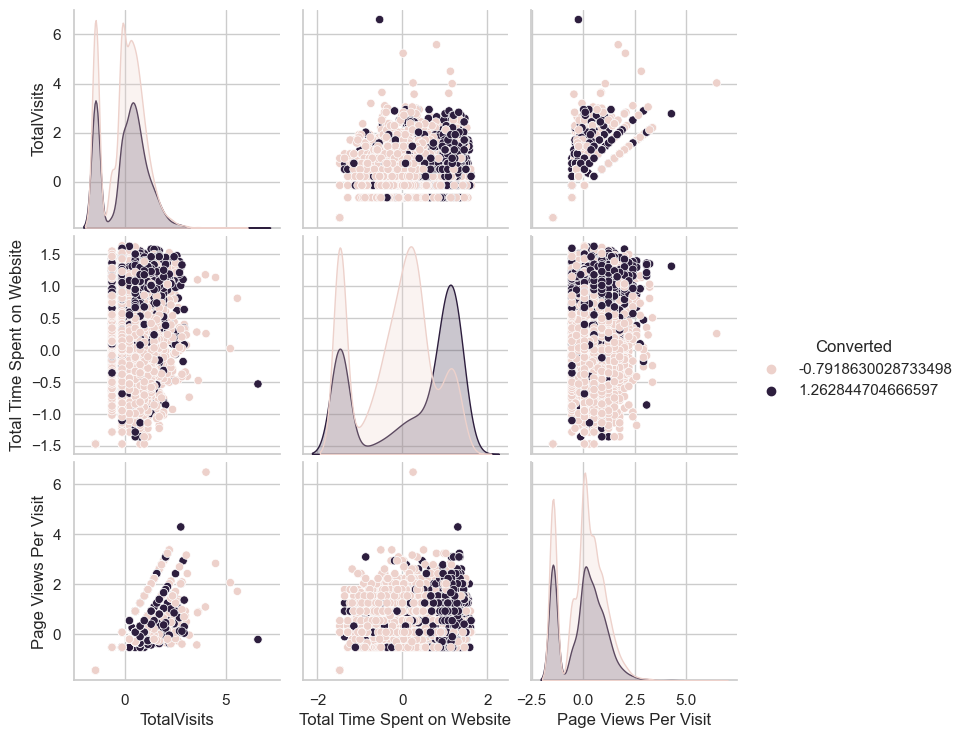

In [22]:
sns.pairplot(transformedx,diag_kind='kde',hue='Converted')
plt.show()

In [23]:
#dropping above columns

df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [24]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [25]:
# Checking the number of null values again
df.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
What is your current occupation                  2690
Last Activity                                     103
Lead Source                                        36
Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Do Not Email                                        0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64

In [26]:
# Dropping the null values rows in the column 'What is your current occupation'

df = df[~pd.isnull(df['What is your current occupation'])]

C:\Users\praka\AppData\Local\Temp\ipykernel_11216\3100888835.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,cmap="BrBG", robust=True,linewidth=0.1, vmin=-1 )


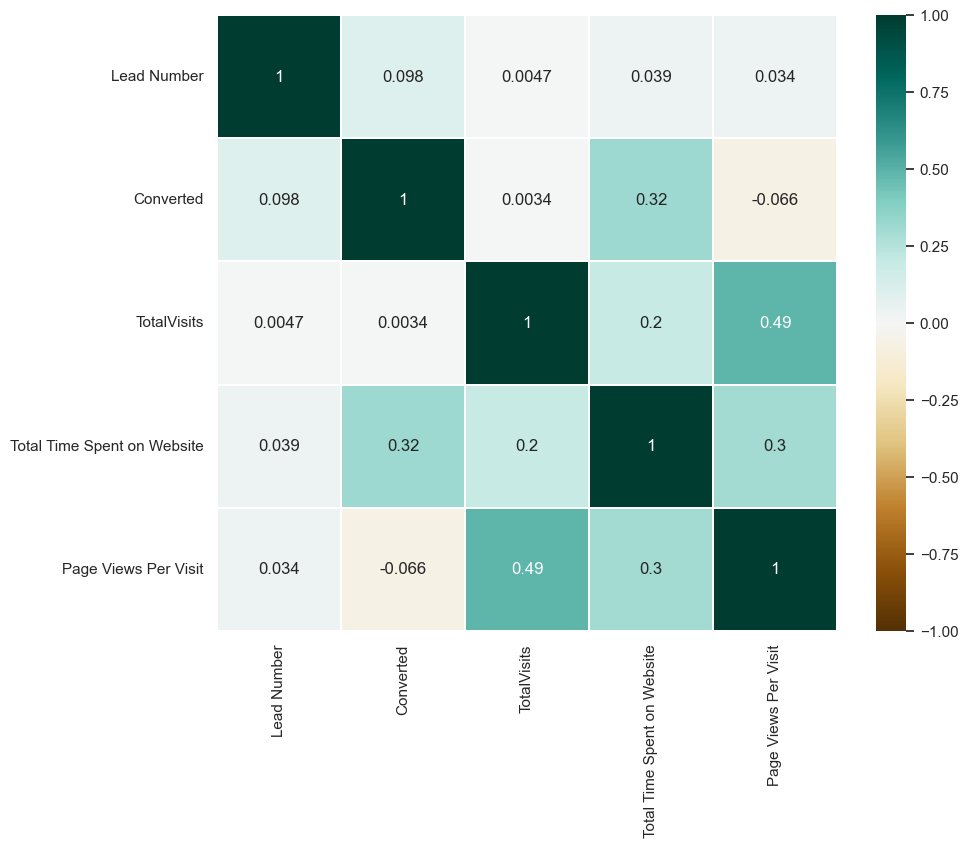

In [27]:
# Observing Correlation
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df.corr(), annot=True,cmap="BrBG", robust=True,linewidth=0.1, vmin=-1 )
plt.show()

### Analysing Categorical features

In [28]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

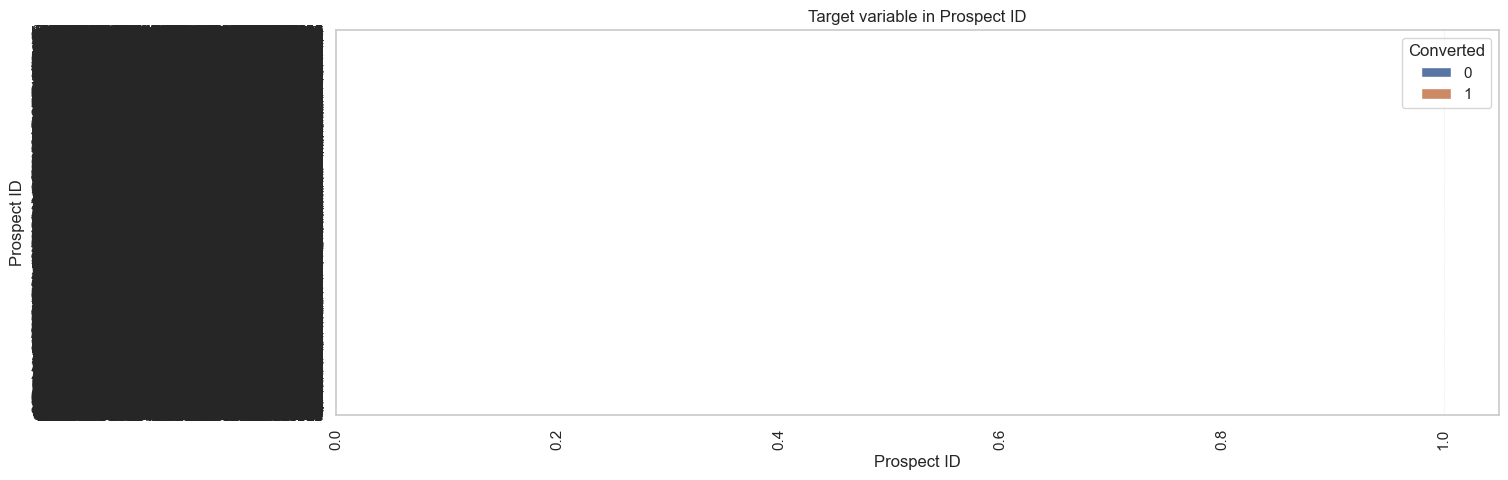

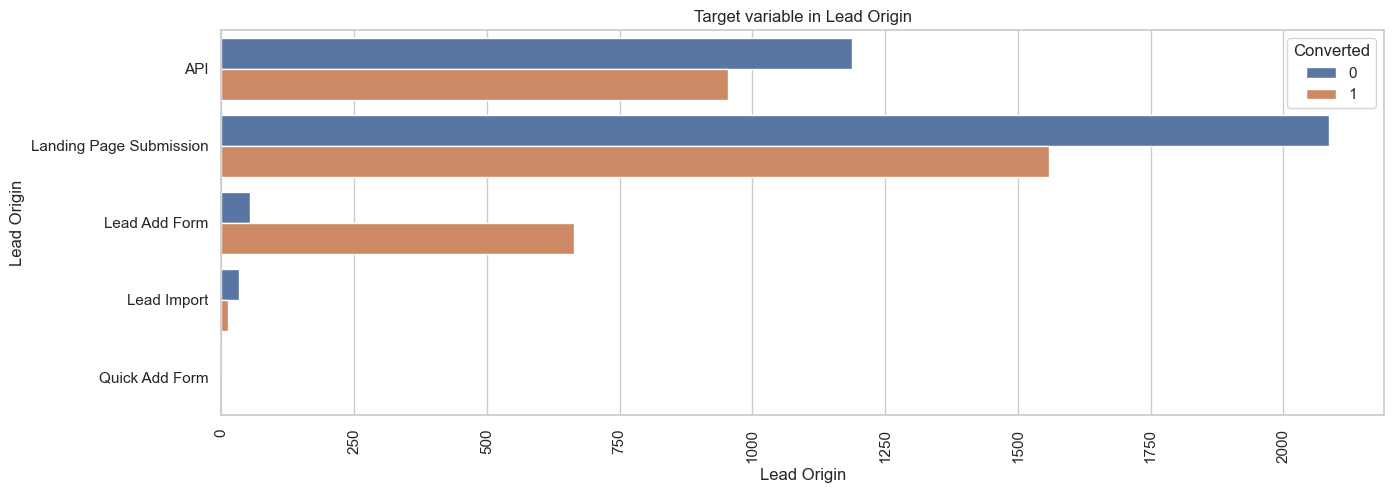

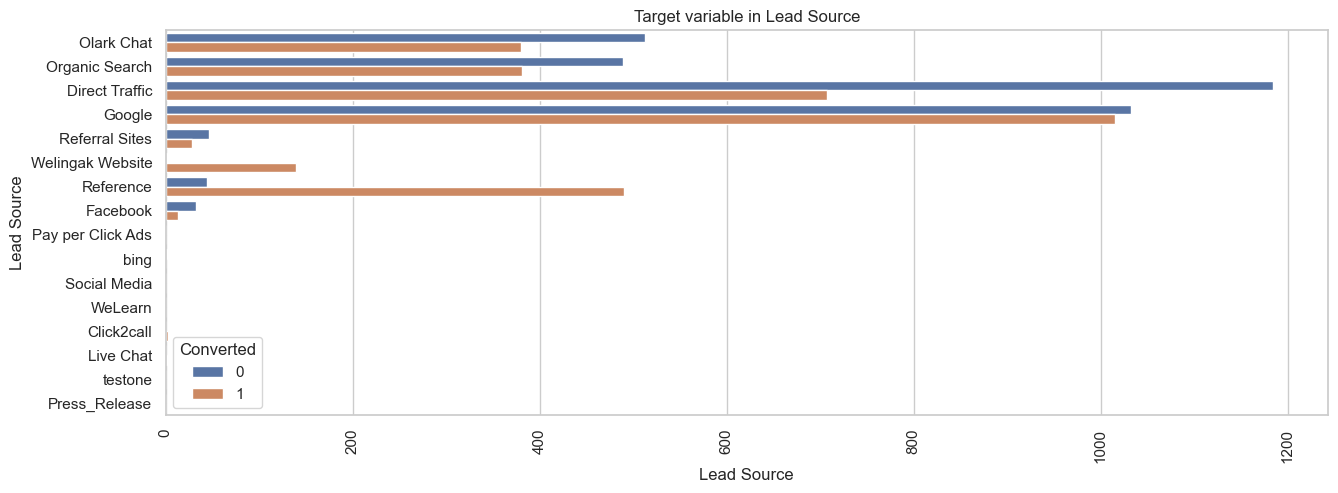

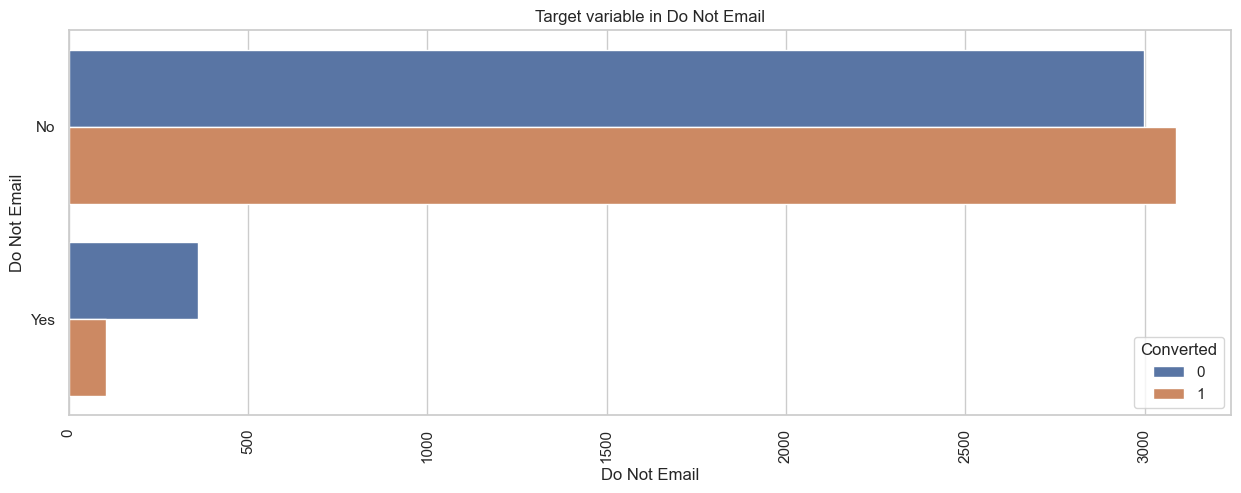

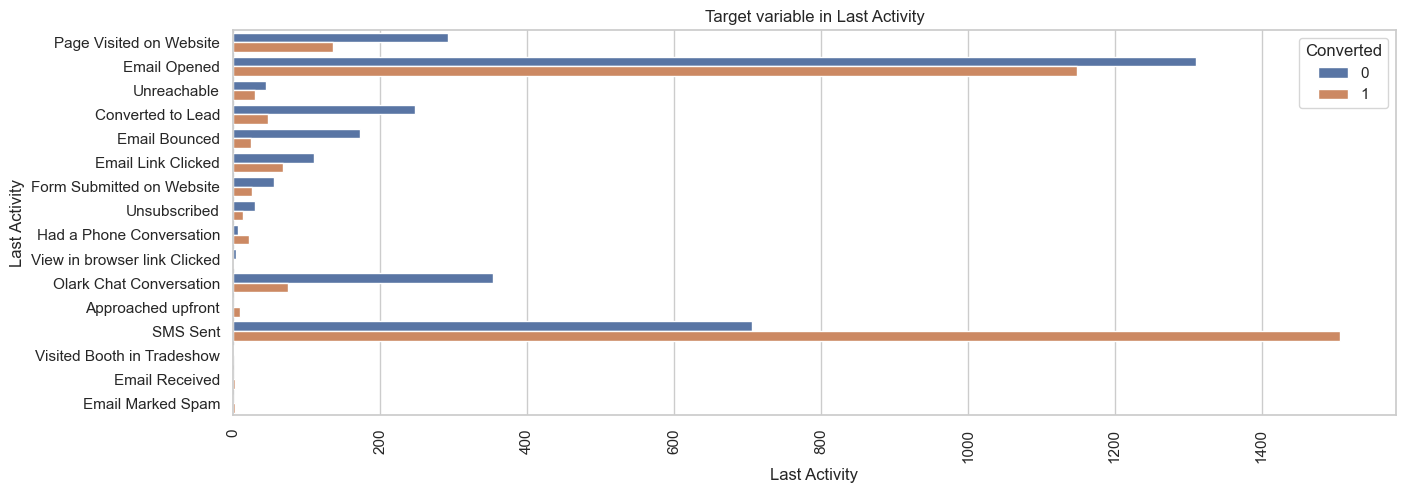

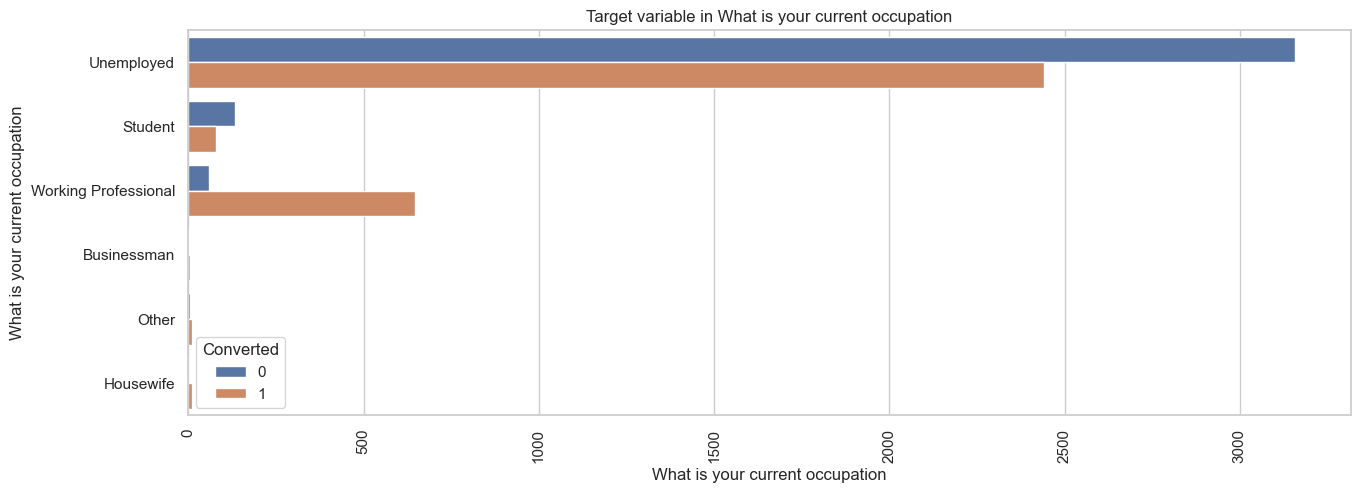

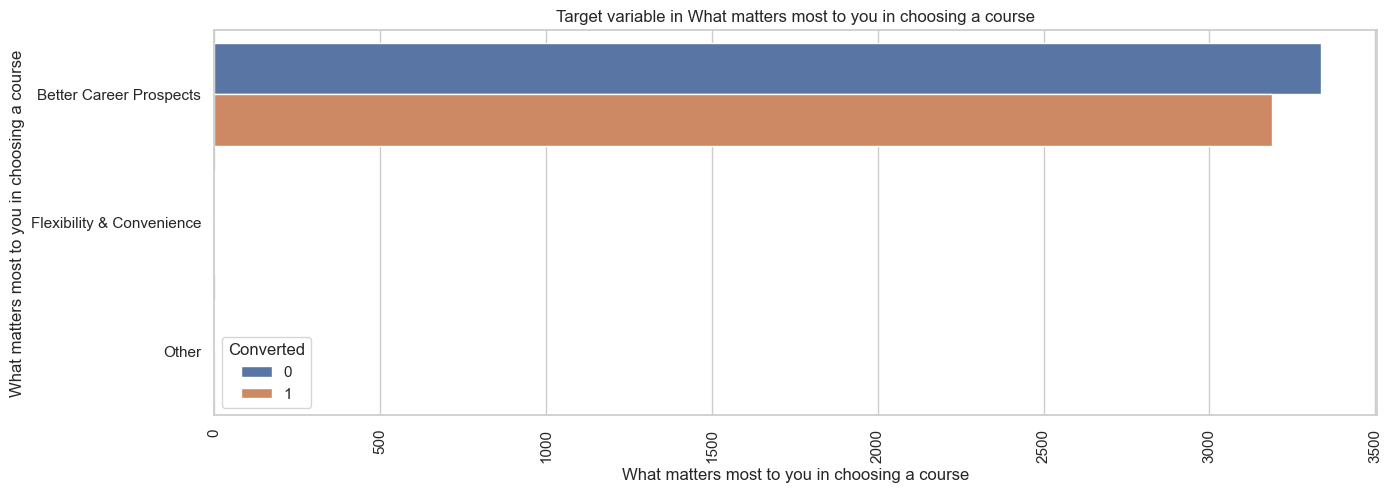

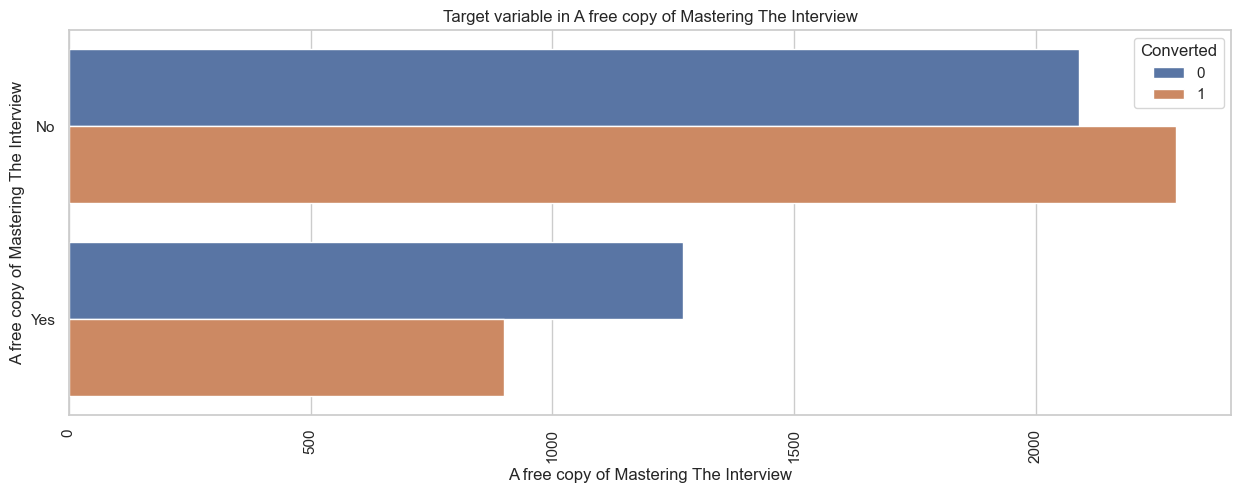

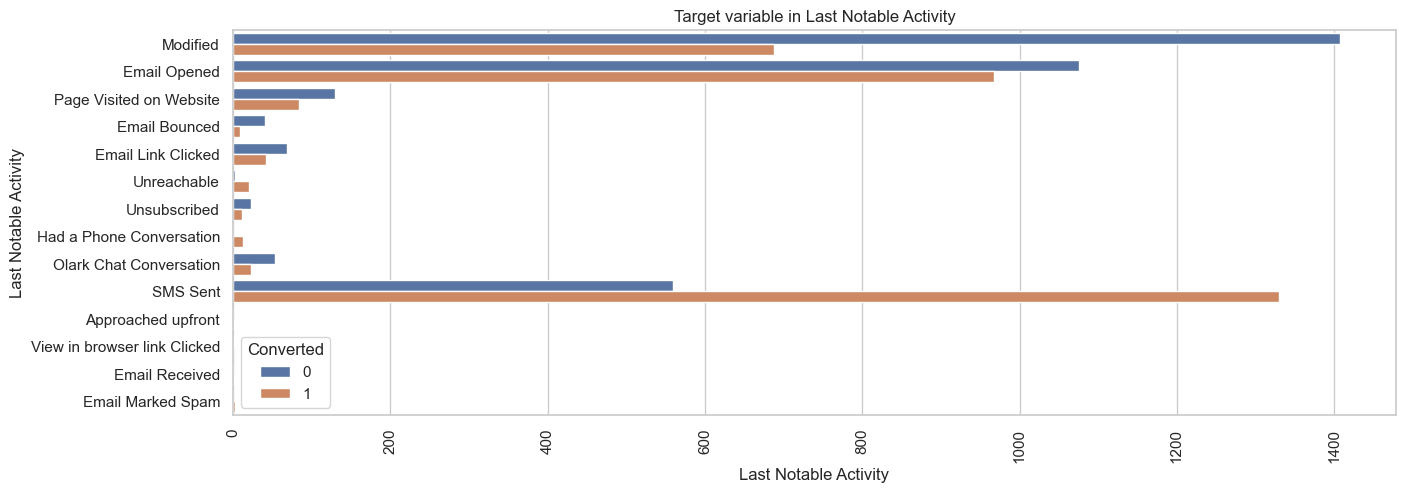

In [29]:
conv = df.select_dtypes(include ="object").columns
for i in conv:
    
    plt.figure(figsize =(15,5))
    sns.countplot(data = df, y= df[i], hue=df.Converted)
    plt.xticks(rotation = 90)
    plt.title('Target variable in'+' '+ i)
    plt.xlabel(i)
    plt.show()

'What matters most to you in choosing a course' seems to have nigh null values.Also almost all of the values are under 'Better Career Prospects' so this field can be dropped and 'What is your current occupation' which has seconf highest null values has high values of 'unemployed', so this can also be dropped.

In [30]:
df.drop(['What matters most to you in choosing a course','What is your current occupation'], axis = 1, inplace = True)

In [31]:
# Checking the number of null values again
df.isnull().sum().sort_values(ascending=False)

Last Activity                             103
Lead Source                                36
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

We can remove the null values from 'Last Activity' and 'Lead Source' as the numbers are very less.

In [32]:
df = df[~pd.isnull(df['Last Activity'])]

In [33]:
df = df[~pd.isnull(df['Lead Source'])]

In [34]:
df.isnull().sum().sort_values(ascending=False)

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Now your data doesn't have any null values. Let's now check the percentage of rows that we have retained.

In [35]:
print(len(df.index))
print(len(df.index)/9240)

6413
0.694047619047619


We have retained around 69% of the rows which seems fairly enough.

In [36]:
# Let's look at the dataset again

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0.0,0.0,Page Visited on Website,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674.0,2.5,Email Opened,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532.0,2.0,Email Opened,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305.0,1.0,Unreachable,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428.0,1.0,Converted to Lead,No,Modified


Now, clearly the variables Prospect ID and Lead Number won't be of any use in the analysis, so it's best that we drop these two variables.

In [37]:
# Dropping the "Prospect ID" and "Lead Number" 
df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

C:\Users\praka\AppData\Local\Temp\ipykernel_11216\2315030567.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)


In [38]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0.0,0.0,Page Visited on Website,No,Modified
1,API,Organic Search,No,0,5.0,674.0,2.5,Email Opened,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532.0,2.0,Email Opened,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305.0,1.0,Unreachable,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428.0,1.0,Converted to Lead,No,Modified


### Dummy variable creation

The next step is to dealing with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables

In [39]:
# Checking the columns which are of type 'object'

temp = df.loc[:, df.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [40]:
# Creating dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                            'A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
df = pd.concat([df, dummy], axis=1)

In [41]:
# Dropping the variables for which the dummy variables have been created

df = df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

C:\Users\praka\AppData\Local\Temp\ipykernel_11216\260196615.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',


In [42]:
# Let's take a look at the dataset again

df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674.0,2.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532.0,2.0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305.0,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428.0,1.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


### Test-Train Data Split

The next step is to spliting the dataset into training an testing sets.

In [43]:
# Put all the feature variables in X

X = df.drop(['Converted'], 1)
X.head()

C:\Users\praka\AppData\Local\Temp\ipykernel_11216\3375213743.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop(['Converted'], 1)


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674.0,2.5,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.0,1532.0,2.0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.0,305.0,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428.0,1.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [44]:
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [45]:
# Spliting the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [46]:
#lets check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (4489, 51)
y_train Size (4489,)


### Scaling
Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [47]:
# Scaling the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8943,0.007968,0.544454,0.036364,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6777,0.011952,0.038292,0.054545,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6716,0.011952,0.147447,0.054545,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7033,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3843,0.007968,0.143486,0.036364,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [48]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,4489.000000,4489.000000,4489.000000,4489.000000,4489.000000,4489.000000,4489.000000,4489.000000,4489.000000,4489.0,...,4489.000000,4489.000000,4489.000000,4489.000000,4489.000000,4489.000000,4489.000000,4489.000000,4489.000000,4489.000000
mean,0.014780,0.236789,0.045547,0.570728,0.090221,0.004455,0.290711,0.004678,0.327913,0.0,...,0.320116,0.000223,0.002005,0.308978,0.011361,0.035197,0.288706,0.003119,0.005346,0.000223
std,0.022135,0.249224,0.040660,0.495027,0.286529,0.066607,0.454141,0.068244,0.469505,0.0,...,0.466573,0.014925,0.044736,0.462123,0.105993,0.184298,0.453211,0.055765,0.072931,0.014925
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007968,0.015405,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.011952,0.127201,0.036364,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.019920,0.455986,0.063636,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlations
Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

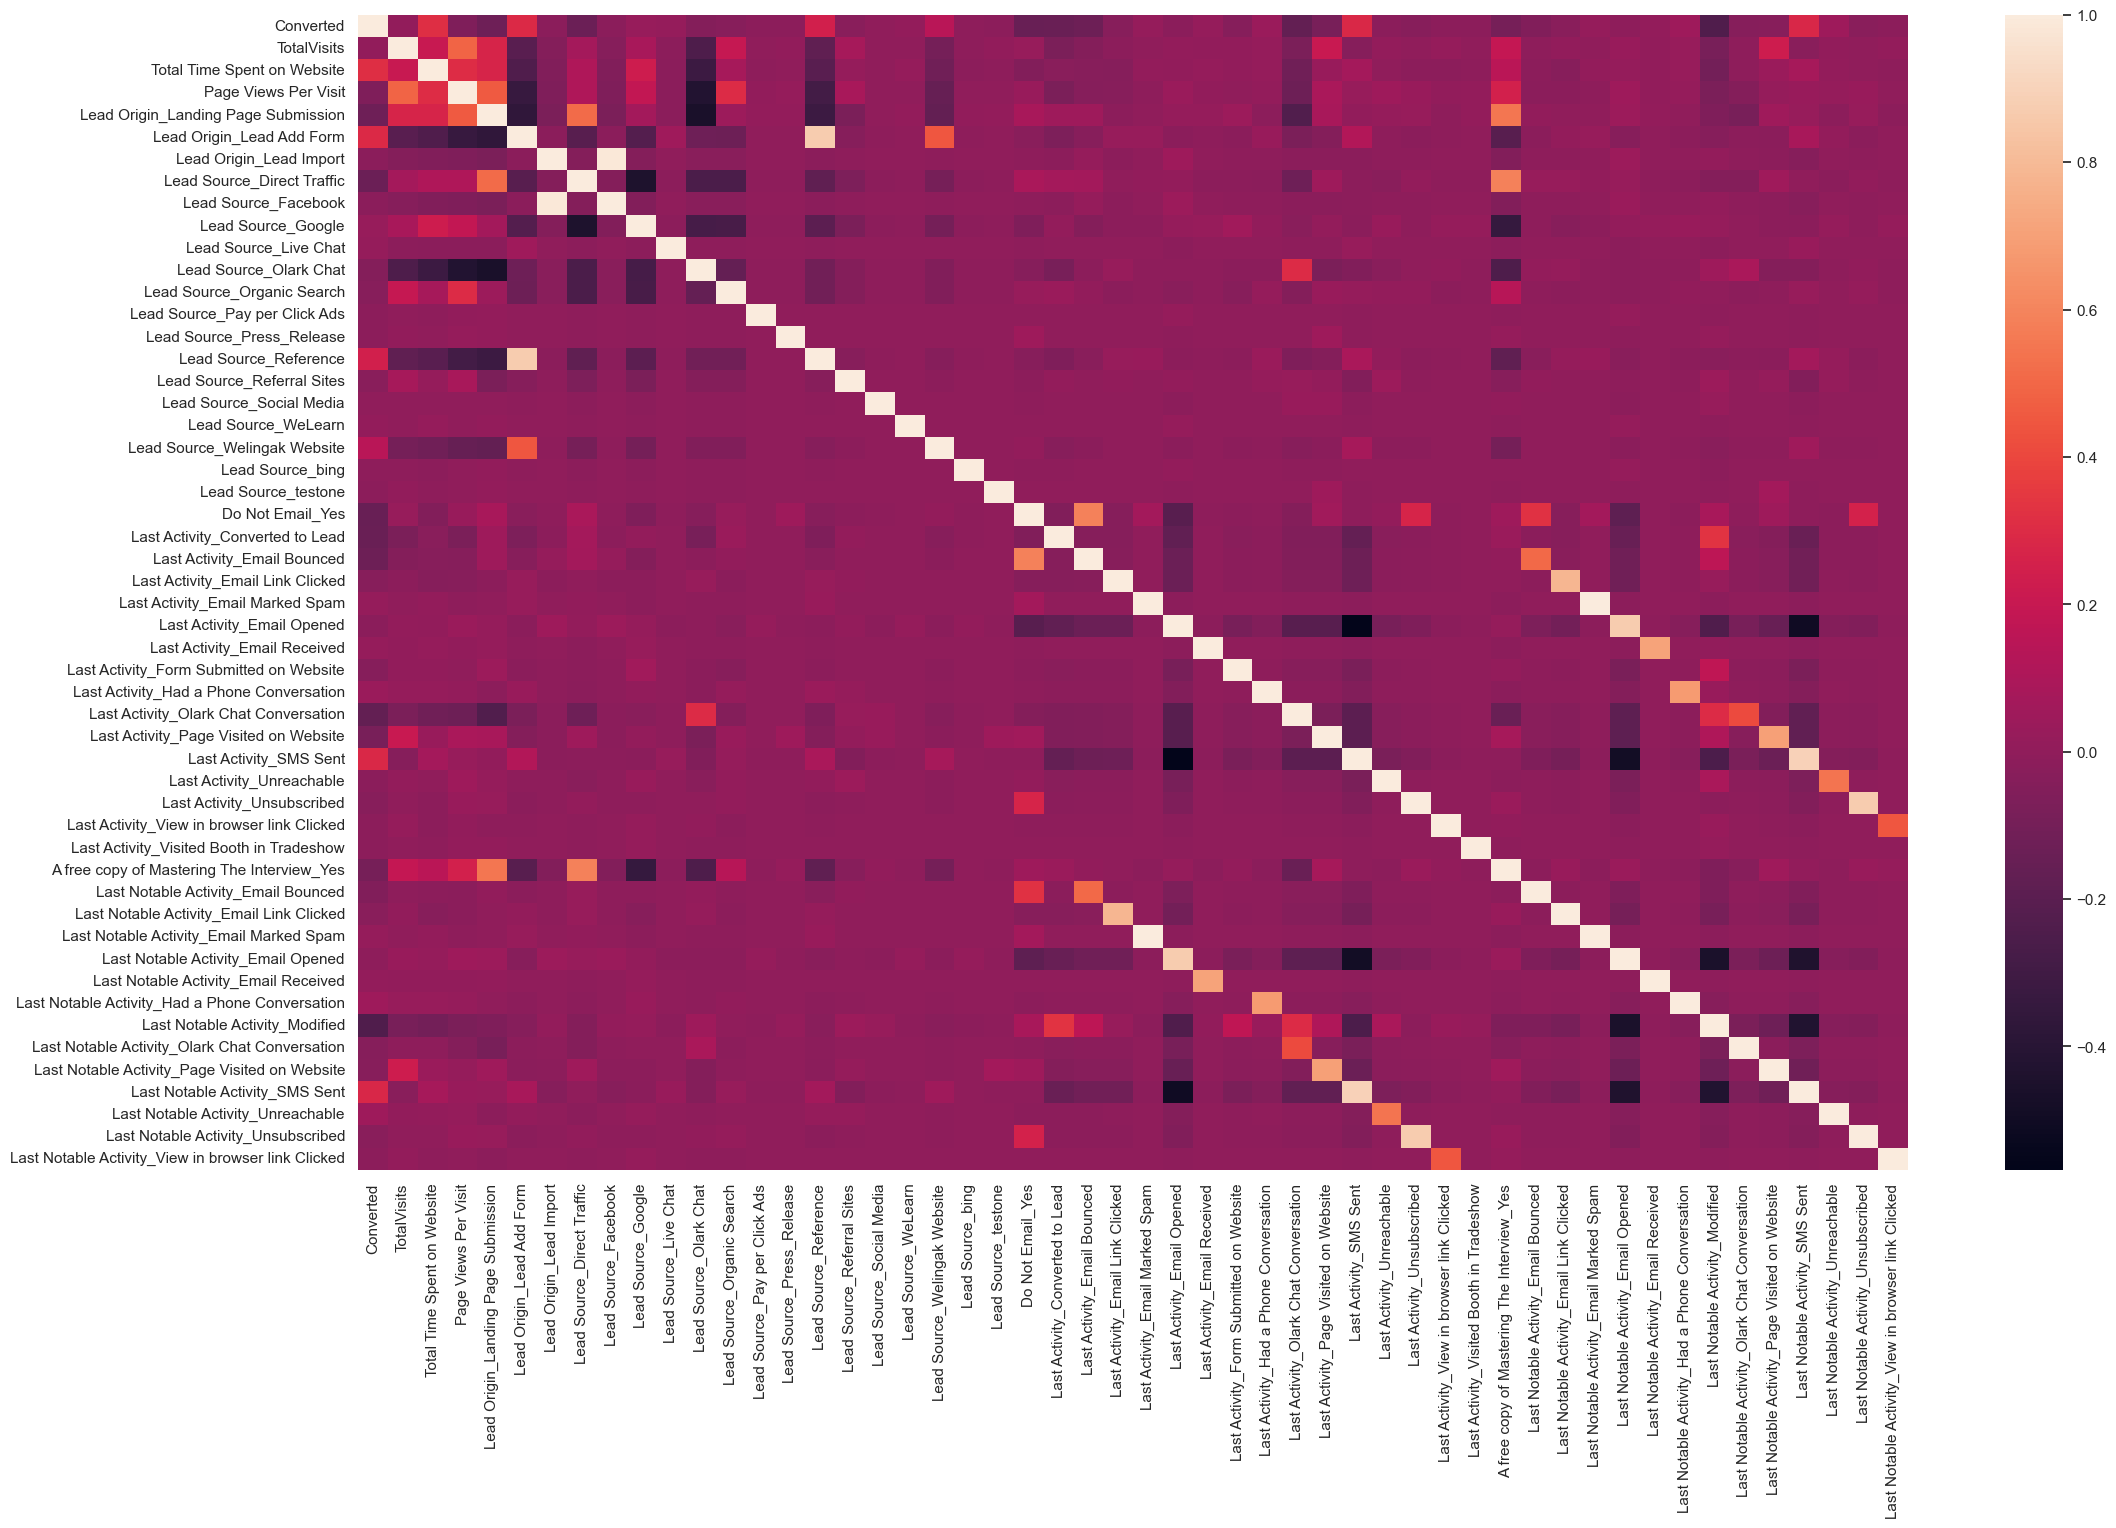

In [49]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(df.corr())
plt.show()


## Step 2: Model Building
Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [50]:
# Importing the 'LogisticRegression' and creating a LogisticRegression object
lg = LogisticRegression()

In [51]:
# Importing the 'RFE' and select 15 variables

rfe = RFE(lg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [52]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 29),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 4),
 ('Lead Source_Facebook', False, 20),
 ('Lead Source_Google', False, 13),
 ('Lead Source_Live Chat', False, 37),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 12),
 ('Lead Source_Pay per Click Ads', False, 16),
 ('Lead Source_Press_Release', False, 34),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 14),
 ('Lead Source_Social Media', False, 8),
 ('Lead Source_WeLearn', False, 28),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 21),
 ('Lead Source_testone', False, 15),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', False, 6),
 ('Last Activity_Email Link Clicked'

In [53]:
# Putting all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [54]:
# Select only the columns selected by RFE

X_train = X_train[col]

### Model 1

In [55]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4489
Model:                            GLM   Df Residuals:                     4473
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2188.0
Date:                Fri, 16 Feb 2024   Deviance:                       4376.0
Time:                        10:18:05   Pearson chi2:                 4.81e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3366
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.8909      0.107    -17.653      0.000      -2.101      -1.681
TotalVisits                                       11.6865      2.888      4.046      0.000       6.025      17.348
Total Time Spent on Website                        4.6308      0.184     25.145      0.000       4.270       4.992
Page Views Per Visit                              -3.5106      1.374     -2.555      0.011      -6.204      -0.817
Lead Origin_Lead Add Form                          2.7229      1.183      2.302      0.021       0.404       5.042
Lead Origin_Lead Import                            1.0832      0.489      2.215      0.027       0.125       2.042
Lead Source_Olark Chat                             1.4987      0.135     11.114      0.000       1.234       1.763
Lead Source_Reference                              1.2537      1.200      1.045      0.296      -1.098       3.606
Lead Source_Welingak Website                       3.2519      1.553      2.094      0.036       0.208       6.296
Do Not Email_Yes                                  -1.7760      0.202     -8.772      0.000      -2.173      -1.379
Last Activity_Converted to Lead                   -1.0031      0.224     -4.471      0.000      -1.443      -0.563
Last Activity_Olark Chat Conversation             -1.2232      0.174     -7.022      0.000      -1.565      -0.882
Last Activity_SMS Sent                             1.1499      0.082     13.952      0.000       0.988       1.311
Last Activity_Unsubscribed                         1.4351      0.474      3.030      0.002       0.507       2.363
Last Notable Activity_Had a Phone Conversation    22.8726   1.33e+04      0.002      0.999    -2.6e+04    2.61e+04
Last Notable Activity_Unreachable                  2.2710      0.822      2.761      0.006       0.659       3.883
==================================================================================================================
"""

There are quite a few variable which have a p-value greater than 0.05. We will need to take care of them. But first, let's also look at the VIFs.

### VIF

In [56]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,81.05
6,Lead Source_Reference,63.54
7,Lead Source_Welingak Website,18.66
2,Page Views Per Visit,2.60
1,Total Time Spent on Website,1.90
0,TotalVisits,1.83
11,Last Activity_SMS Sent,1.56
5,Lead Source_Olark Chat,1.23
10,Last Activity_Olark Chat Conversation,1.20
8,Do Not Email_Yes,1.16


VIFs seem to be in a decent range except for three variables.

Let's first drop the variable Lead Source_Reference since it has a high p-value as well as a high VIF.

In [57]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

### Model 2

In [58]:
# Refit the model with the new set of features

lgm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
lgm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4489
Model:                            GLM   Df Residuals:                     4474
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2188.5
Date:                Fri, 16 Feb 2024   Deviance:                       4376.9
Time:                        10:18:09   Pearson chi2:                 4.80e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3364
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.8911      0.107    -17.652      0.000      -2.101      -1.681
TotalVisits                                       11.6824      2.889      4.044      0.000       6.021      17.344
Total Time Spent on Website                        4.6303      0.184     25.140      0.000       4.269       4.991
Page Views Per Visit                              -3.5133      1.374     -2.557      0.011      -6.207      -0.820
Lead Origin_Lead Add Form                          3.9458      0.239     16.530      0.000       3.478       4.414
Lead Origin_Lead Import                            1.0832      0.489      2.215      0.027       0.125       2.042
Lead Source_Olark Chat                             1.4984      0.135     11.110      0.000       1.234       1.763
Lead Source_Welingak Website                       2.0281      1.033      1.964      0.050       0.004       4.052
Do Not Email_Yes                                  -1.7738      0.202     -8.770      0.000      -2.170      -1.377
Last Activity_Converted to Lead                   -1.0027      0.224     -4.469      0.000      -1.442      -0.563
Last Activity_Olark Chat Conversation             -1.2224      0.174     -7.018      0.000      -1.564      -0.881
Last Activity_SMS Sent                             1.1512      0.082     13.974      0.000       0.990       1.313
Last Activity_Unsubscribed                         1.4338      0.473      3.028      0.002       0.506       2.362
Last Notable Activity_Had a Phone Conversation    22.8735   1.33e+04      0.002      0.999   -2.61e+04    2.61e+04
Last Notable Activity_Unreachable                  2.2720      0.822      2.763      0.006       0.660       3.884
==================================================================================================================
"""

In [59]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,2.60
1,Total Time Spent on Website,1.90
0,TotalVisits,1.83
10,Last Activity_SMS Sent,1.56
3,Lead Origin_Lead Add Form,1.37
6,Lead Source_Welingak Website,1.28
5,Lead Source_Olark Chat,1.23
9,Last Activity_Olark Chat Conversation,1.20
7,Do Not Email_Yes,1.16
11,Last Activity_Unsubscribed,1.10


The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with Last Notable Activity_Had a Phone Conversation.

In [60]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

### Model 3

In [61]:
# Refit the model with the new set of features

lgm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
lgm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4489
Model:                            GLM   Df Residuals:                     4475
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2196.7
Date:                Fri, 16 Feb 2024   Deviance:                       4393.3
Time:                        10:18:13   Pearson chi2:                 4.81e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3340
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.8760      0.107    -17.551      0.000      -2.085      -1.666
TotalVisits                              12.1464      2.924      4.154      0.000       6.416      17.877
Total Time Spent on Website               4.6150      0.184     25.121      0.000       4.255       4.975
Page Views Per Visit                     -3.6211      1.374     -2.635      0.008      -6.315      -0.927
Lead Origin_Lead Add Form                 3.9350      0.239     16.491      0.000       3.467       4.403
Lead Origin_Lead Import                   1.0699      0.489      2.189      0.029       0.112       2.028
Lead Source_Olark Chat                    1.4879      0.135     11.048      0.000       1.224       1.752
Lead Source_Welingak Website              2.0306      1.033      1.966      0.049       0.006       4.055
Do Not Email_Yes                         -1.7805      0.202     -8.809      0.000      -2.177      -1.384
Last Activity_Converted to Lead          -1.0129      0.224     -4.518      0.000      -1.452      -0.573
Last Activity_Olark Chat Conversation    -1.2304      0.174     -7.066      0.000      -1.572      -0.889
Last Activity_SMS Sent                    1.1404      0.082     13.865      0.000       0.979       1.302
Last Activity_Unsubscribed                1.4296      0.473      3.022      0.003       0.502       2.357
Last Notable Activity_Unreachable         2.2567      0.822      2.745      0.006       0.645       3.868
=========================================================================================================
"""

In [62]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,2.60
1,Total Time Spent on Website,1.89
0,TotalVisits,1.83
10,Last Activity_SMS Sent,1.56
3,Lead Origin_Lead Add Form,1.37
6,Lead Source_Welingak Website,1.28
5,Lead Source_Olark Chat,1.23
9,Last Activity_Olark Chat Conversation,1.20
7,Do Not Email_Yes,1.16
11,Last Activity_Unsubscribed,1.10


## Step 3: Model Evaluation
Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [66]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4489
Model:                            GLM   Df Residuals:                     4475
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2196.7
Date:                Fri, 16 Feb 2024   Deviance:                       4393.3
Time:                        11:59:10   Pearson chi2:                 4.81e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3340
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.8760      0.107    -17.551      0.000      -2.085      -1.666
TotalVisits                              12.1464      2.924      4.154      0.000       6.416      17.877
Total Time Spent on Website               4.6150      0.184     25.121      0.000       4.255       4.975
Page Views Per Visit                     -3.6211      1.374     -2.635      0.008      -6.315      -0.927
Lead Origin_Lead Add Form                 3.9350      0.239     16.491      0.000       3.467       4.403
Lead Origin_Lead Import                   1.0699      0.489      2.189      0.029       0.112       2.028
Lead Source_Olark Chat                    1.4879      0.135     11.048      0.000       1.224       1.752
Lead Source_Welingak Website              2.0306      1.033      1.966      0.049       0.006       4.055
Do Not Email_Yes                         -1.7805      0.202     -8.809      0.000      -2.177      -1.384
Last Activity_Converted to Lead          -1.0129      0.224     -4.518      0.000      -1.452      -0.573
Last Activity_Olark Chat Conversation    -1.2304      0.174     -7.066      0.000      -1.572      -0.889
Last Activity_SMS Sent                    1.1404      0.082     13.865      0.000       0.979       1.302
Last Activity_Unsubscribed                1.4296      0.473      3.022      0.003       0.502       2.357
Last Notable Activity_Unreachable         2.2567      0.822      2.745      0.006       0.645       3.868
=========================================================================================================
"""

In [67]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8943    0.850957
6777    0.351773
6716    0.046159
7033    0.969213
3843    0.222926
3446    0.504701
1736    0.404176
7417    0.922835
8506    0.347887
6063    0.679671
dtype: float64

In [68]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.850957  , 0.35177295, 0.04615904, 0.96921272, 0.22292633,
       0.50470111, 0.40417615, 0.92283476, 0.3478871 , 0.67967079])

### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [69]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.850957
1,0,0.351773
2,0,0.046159
3,1,0.969213
4,0,0.222926


### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [70]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.850957,1
1,0,0.351773,0
2,0,0.046159,0
3,1,0.969213,1
4,0,0.222926,0


### Creating the Confusion matrix

In [71]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1908  413]
 [ 608 1560]]


In [72]:

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7725551347738917


In [73]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [74]:
# Calculating the 'sensitivity'

TP/(TP+FN)

0.7195571955719557

In [75]:
# Calculating the 'specificity'

TN/(TN+FP)

0.8220594571305472

### Finding the Optimal Cutoff
Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [76]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [77]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate=False)

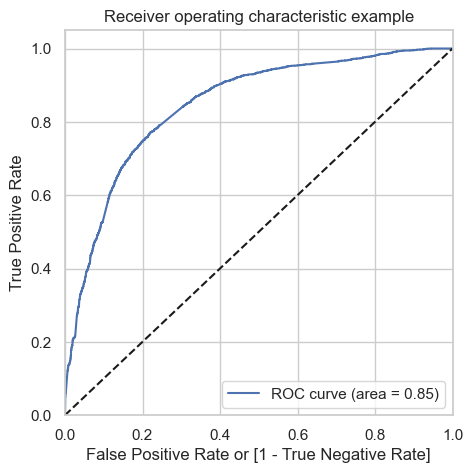

In [78]:
# Calling the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.8 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [79]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.850957,1,1,1,1,1,1,1,1,1,1,0
1,0,0.351773,0,1,1,1,1,0,0,0,0,0,0
2,0,0.046159,0,1,0,0,0,0,0,0,0,0,0
3,1,0.969213,1,1,1,1,1,1,1,1,1,1,1
4,0,0.222926,0,1,1,1,0,0,0,0,0,0,0


In [80]:
 #Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.482958  1.000000  0.000000
0.1   0.1  0.548006  0.993542  0.131840
0.2   0.2  0.691914  0.945111  0.455407
0.3   0.3  0.743595  0.907288  0.590694
0.4   0.4  0.765204  0.842712  0.692805
0.5   0.5  0.772555  0.719557  0.822059
0.6   0.6  0.758521  0.641605  0.867729
0.7   0.7  0.715527  0.507380  0.909953
0.8   0.8  0.677656  0.392066  0.944421
0.9   0.9  0.603030  0.198801  0.980612


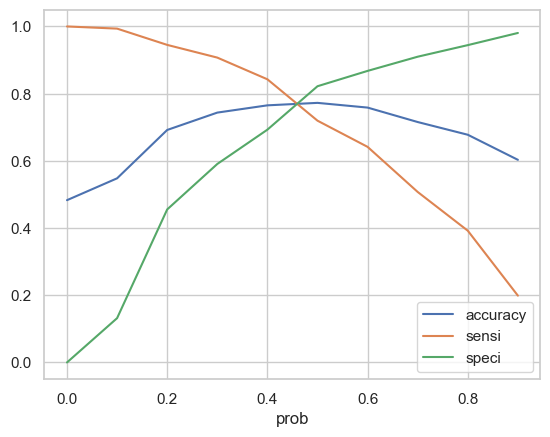

In [81]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [82]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.850957,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.351773,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.046159,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.969213,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.222926,0,1,1,1,0,0,0,0,0,0,0,0


In [83]:
# Let's checking the `accuracy` now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7738917353530853

In [84]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1782,  539],
       [ 476, 1692]], dtype=int64)

In [85]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [86]:
# Calculating the 'Sensitivity'

TP/(TP+FN)

0.7804428044280443

In [87]:
# Calculating the 'Specificity'

TN/(TN+FP)

0.7677725118483413

This cutoof seems good.

## Step 4: Making Predictions on the Test Set

In [88]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] =  scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [89]:
# Selecting the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_Unsubscribed,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
983,0.000000,0.000000,0.000000,1,0,0,1,0,0,0,0,0,0,0,0
3179,0.015936,0.172095,0.072727,0,0,0,0,0,0,0,0,0,0,0,0
6683,0.019920,0.025088,0.045455,0,0,0,0,0,0,0,0,0,0,0,0
2187,0.007968,0.058539,0.036364,0,0,0,0,0,0,0,0,1,0,0,0
2729,0.015936,0.561620,0.072727,0,0,0,0,0,0,0,0,1,0,0,0


In [90]:
# Adding a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [91]:
# Checking X_test_sm

X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_Unsubscribed,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
983,1.0,0.000000,0.000000,0.000000,1,0,0,1,0,0,0,0,0,0,0,0
3179,1.0,0.015936,0.172095,0.072727,0,0,0,0,0,0,0,0,0,0,0,0
6683,1.0,0.019920,0.025088,0.045455,0,0,0,0,0,0,0,0,0,0,0,0
2187,1.0,0.007968,0.058539,0.036364,0,0,0,0,0,0,0,0,1,0,0,0
2729,1.0,0.015936,0.561620,0.072727,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7166,1.0,0.015936,0.330986,0.072727,0,0,0,0,0,0,0,0,0,0,0,0
4424,1.0,0.000000,0.000000,0.000000,0,0,1,0,0,0,0,0,1,0,0,0
5318,1.0,0.007968,0.249560,0.036364,0,0,0,0,0,0,0,0,0,0,0,0
654,1.0,0.007968,0.092430,0.036364,0,0,0,0,0,0,0,0,0,0,0,0


In [93]:
# Dropping the required columns from X_test as well

X_test.drop(['Lead Source_Reference',
                     'Last Notable Activity_Had a Phone Conversation'], 1, 
                                inplace = True)

C:\Users\praka\AppData\Local\Temp\ipykernel_11216\1757144171.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test.drop(['Lead Source_Reference',


In [94]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [95]:
y_test_pred[:10]

983     0.886850
3179    0.240205
6683    0.156719
2187    0.377453
2729    0.856492
8205    0.960809
8920    0.420195
4159    0.054828
1559    0.977417
2132    0.886850
dtype: float64

In [96]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [97]:
# Let's see the head

y_pred_1.head()

,0
983,0.886850
3179,0.240205
6683,0.156719
2187,0.377453
2729,0.856492


In [98]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [99]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [100]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [101]:
y_pred_final.head()

,Converted,0
0,1,0.886850
1,1,0.240205
2,1,0.156719
3,0,0.377453
4,1,0.856492


In [102]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [103]:

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.886850
1,1,0.240205
2,1,0.156719
3,0,0.377453
4,1,0.856492


In [104]:
y_pred_final['final_pred'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [105]:
y_pred_final.head()

,Converted,Conversion_Prob,final_pred
0,1,0.886850,1
1,1,0.240205,0
2,1,0.156719,0
3,0,0.377453,0
4,1,0.856492,1


In [107]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_pred)

0.7671517671517671

In [108]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_pred )
confusion2

array([[757, 253],
       [195, 719]], dtype=int64)

In [109]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [110]:
# Calculating the 'sensitivity'
TP / float(TP+FN)

0.7866520787746171

In [111]:
# Calculating the 'specificity'
TN / float(TN+FP)

0.7495049504950495

### Precision-Recall View
Let's now also build the training model using the precision-recall view

In [112]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1908,  413],
       [ 608, 1560]], dtype=int64)

In [113]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7906741003547897

In [114]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7195571955719557

### Precision and recall tradeoff
Importing the Precision recall curve library

In [115]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       1
 4       0
        ..
 4484    0
 4485    0
 4486    0
 4487    0
 4488    0
 Name: Converted, Length: 4489, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 4484    0
 4485    1
 4486    0
 4487    1
 4488    0
 Name: Predicted, Length: 4489, dtype: int64)

In [116]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

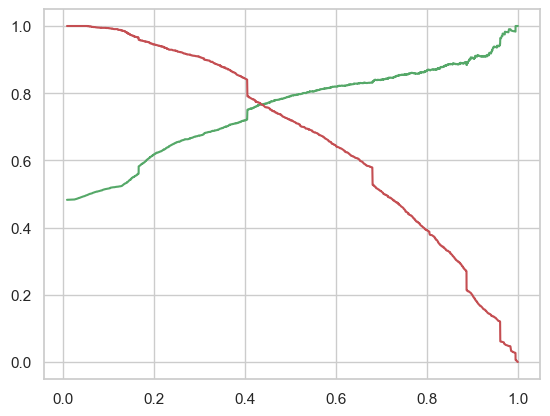

In [117]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [118]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.850957,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.351773,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.046159,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.969213,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.222926,0,1,1,1,0,0,0,0,0,0,0,0


In [119]:
# Let's checking the `accuracy` now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7745600356426822

In [120]:
# Let's creating the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1821,  500],
       [ 512, 1656]], dtype=int64)

In [121]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [122]:
TP/(TP+FP)

0.7680890538033395

In [123]:
TP/(TP+FN)

0.7638376383763837

## Step 5: Making Predictions on the Test Set
Let's now make predicitons on the test set.

In [124]:
# Making predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [125]:
y_test_pred[:10]

983     0.886850
3179    0.240205
6683    0.156719
2187    0.377453
2729    0.856492
8205    0.960809
8920    0.420195
4159    0.054828
1559    0.977417
2132    0.886850
dtype: float64

In [126]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [127]:
# Let's see the head

y_pred_1.head()

,0
983,0.886850
3179,0.240205
6683,0.156719
2187,0.377453
2729,0.856492


In [128]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [129]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [130]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [131]:
# Checking the 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.886850
1,1,0.240205
2,1,0.156719
3,0,0.377453
4,1,0.856492


In [132]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [133]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.886850
1,1,0.240205
2,1,0.156719
3,0,0.377453
4,1,0.856492


In [134]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [135]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.886850,1
1,1,0.240205,0
2,1,0.156719,0
3,0,0.377453,0
4,1,0.856492,1


In [136]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7713097713097713

In [137]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[772, 238],
       [202, 712]], dtype=int64)

In [138]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [139]:
TP/(TP+FP)

0.7494736842105263

In [140]:
TP/(TP+FN)

0.7789934354485777